In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
#change of directory

os.chdir(r'C:\Users\lenovo\Desktop\DS\dataset_air_quality_monitoring')

In [58]:
#upload of the dataset

df = pd.read_csv(r'ancona_data.csv')

In [59]:
df.shape

(417626, 19)

In [60]:
df.describe()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,id
count,409848.000000,392823.000000,389767.000000,372508.000000,417626.000000,417626.000000,417626.000000,417626.000000,417626.000000,417626.000000,4.176260e+05,417626.000000,417626.000000,417626.000000,417626.000000,417626.000000
mean,12.827087,56.985822,18.901080,13.029915,43.567772,13.363402,-0.112081,-0.203619,50.186664,55.321276,1.644118e-03,3.059505,2.777506,55.232497,75.301643,34.636364
std,9.463539,25.881841,10.480908,7.852031,0.074816,0.127325,0.889874,0.956847,17.823638,18.173232,4.932701e-03,0.248034,0.147349,18.209059,18.553947,13.452104
min,0.000000,0.000000,0.000000,0.000000,43.450000,13.150000,-3.877032,-3.671453,8.371775,12.047776,-6.940000e-18,2.718726,2.573985,10.109338,12.943158,22.000000
25%,6.426122,38.156440,11.937048,7.866542,43.527982,13.250000,-0.735605,-0.996508,48.866307,52.033239,2.305655e-07,2.810968,2.628907,52.015683,62.288855,27.000000
50%,10.320171,56.561120,16.547325,11.193825,43.574761,13.361060,-0.368986,-0.360379,56.987120,59.744633,1.271375e-05,3.057545,2.776209,60.127705,79.907559,32.500000
75%,16.195905,74.819915,23.530932,16.167352,43.637500,13.450000,0.456399,0.529858,62.168484,66.947640,6.119069e-04,3.271532,2.902817,66.983502,90.889160,38.000000
max,285.000000,162.000000,249.000000,200.000000,43.650000,13.550000,3.617407,4.307326,72.999793,90.073126,7.496383e-02,3.470822,3.022056,88.419472,99.996023,90.000000


In [24]:
variables = [] #empty list that will contain variable names of the df

#ciclo su ogni colonna
for column in df.columns:
    variables.append(column)

print(variables)

['Date', 'NO2', 'O3', 'PM10', 'PM2.5', 'Latitude', 'Longitude', 'station_name', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity', 'code', 'id']


In [25]:
len(variables)

19

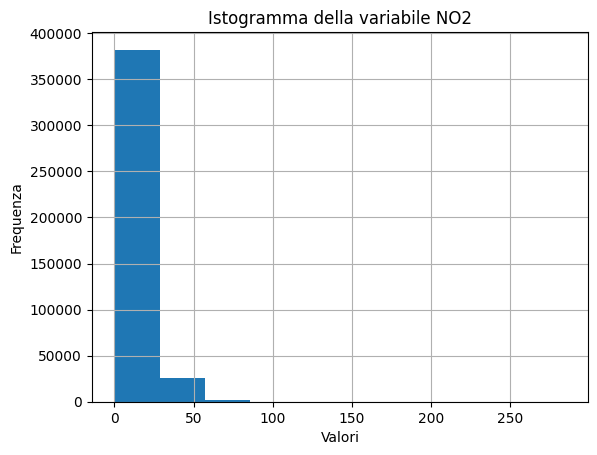

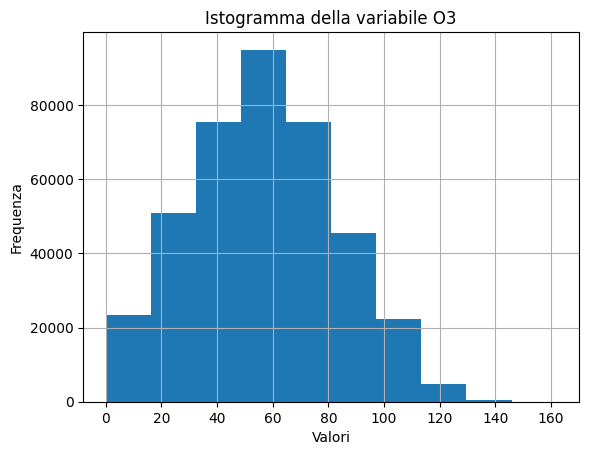

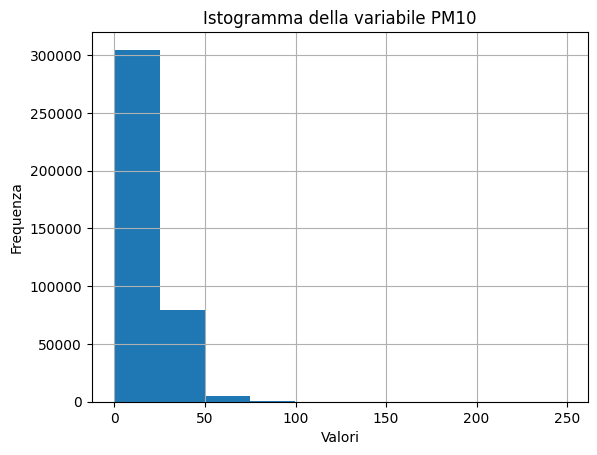

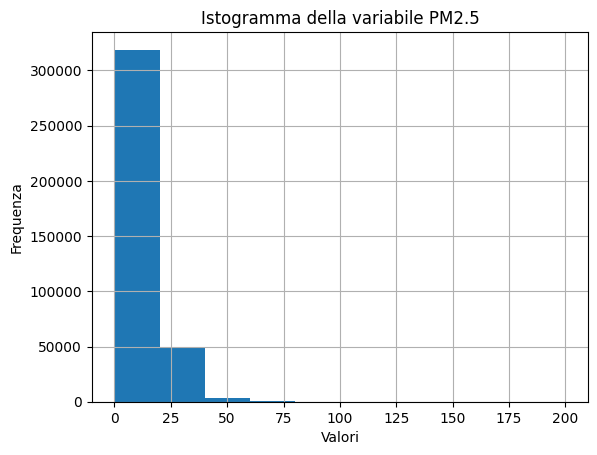

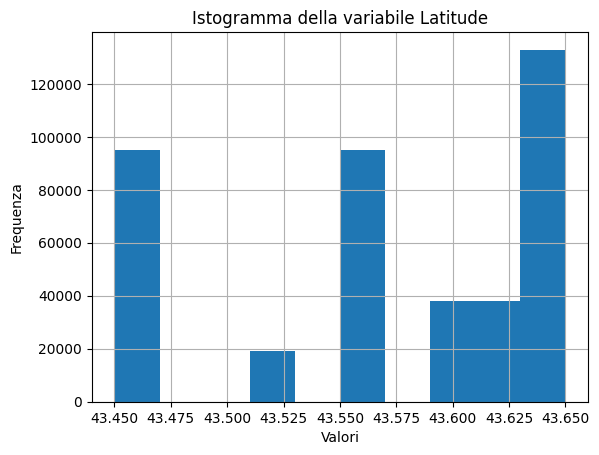

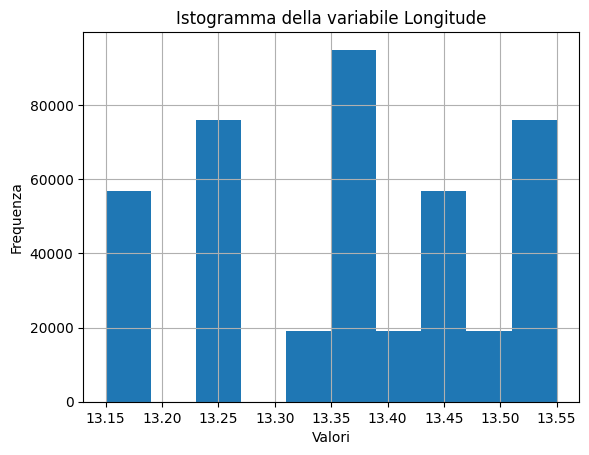

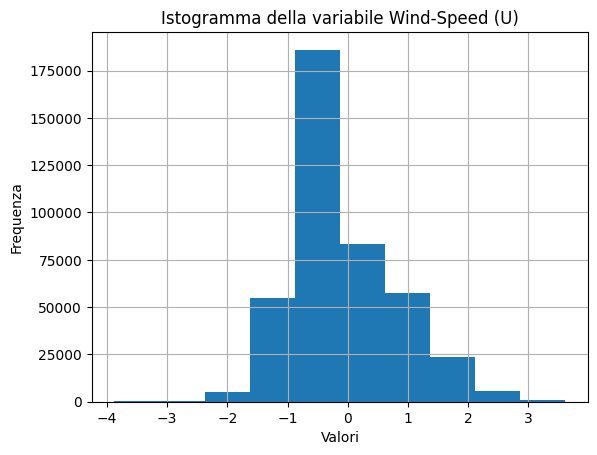

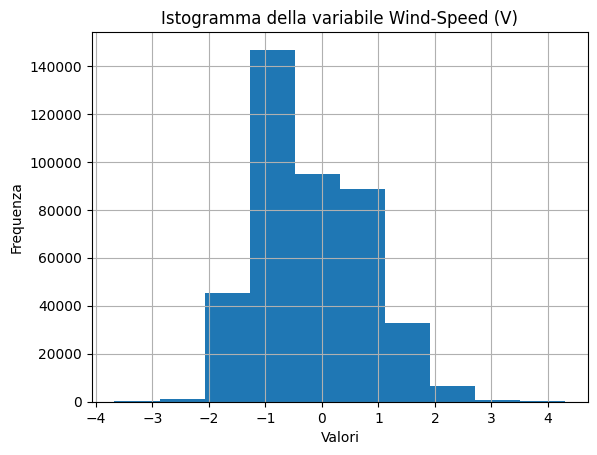

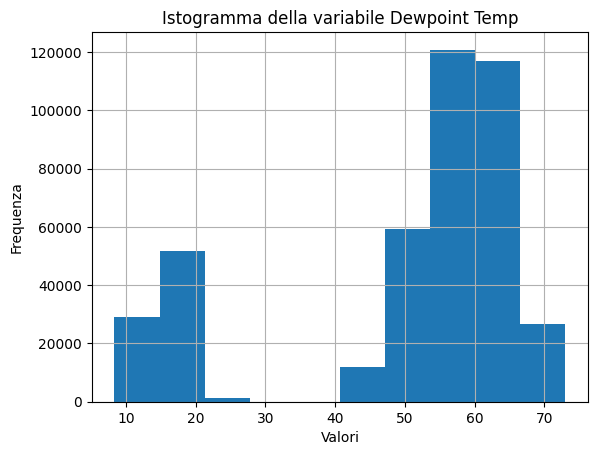

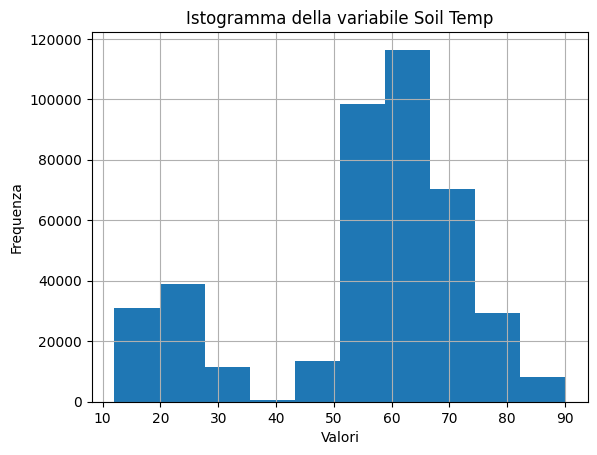

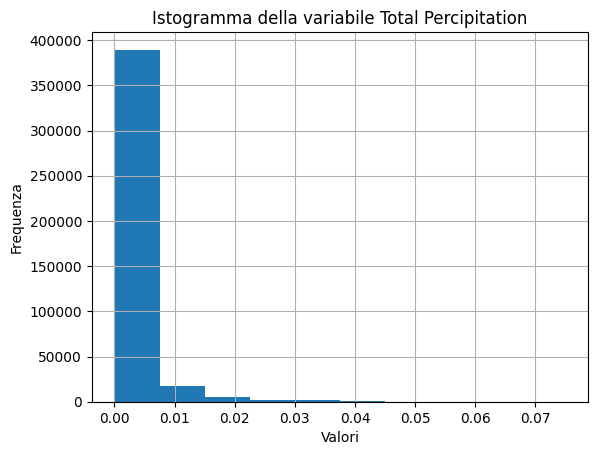

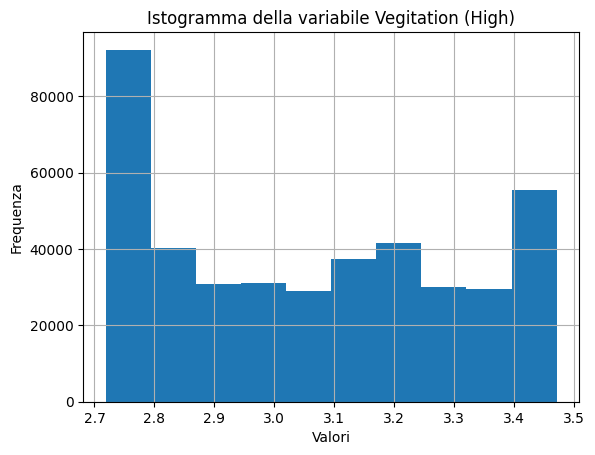

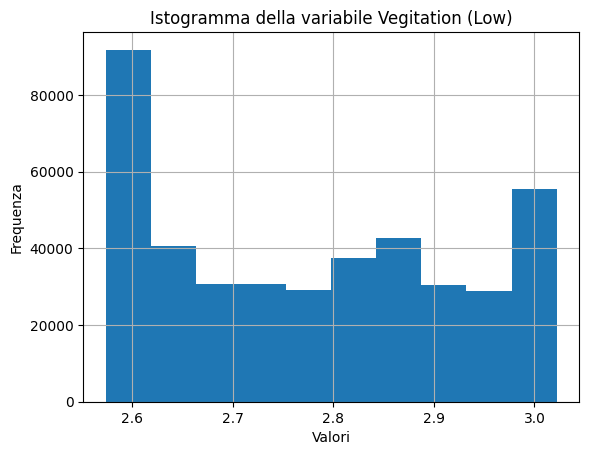

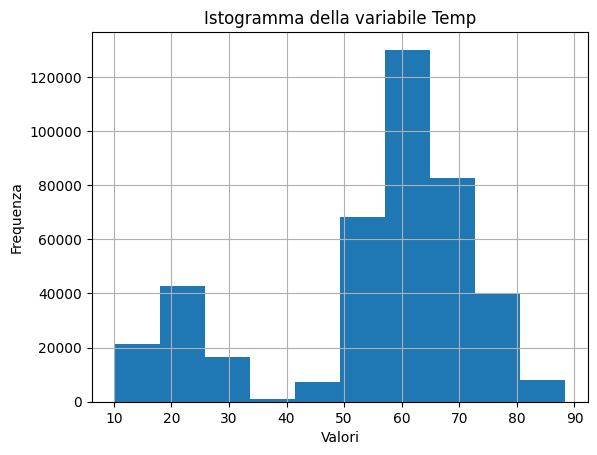

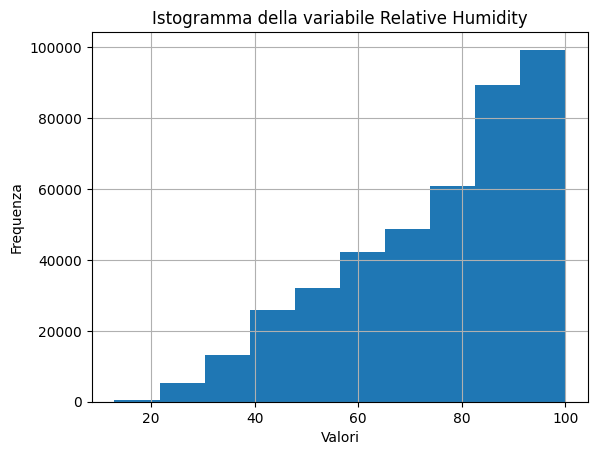

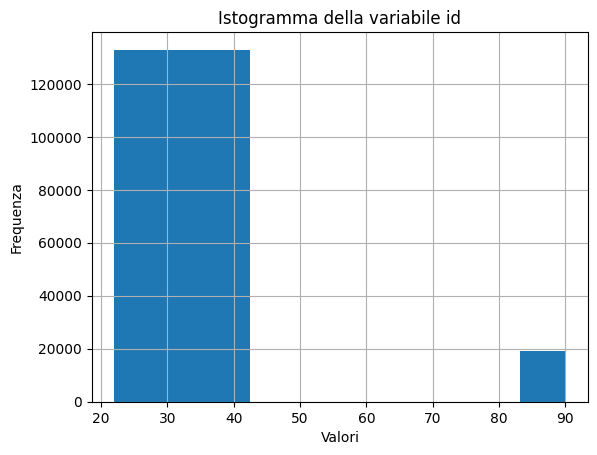

In [26]:
#creazione di istogrammi per le colonne numeriche

for variables in df.columns:
  
  #check del tipo di dato: è numerico?
  if pd.api.types.is_numeric_dtype(df[variables]):
    plt.hist(df[variables])
    plt.xlabel("Valori")
    plt.ylabel("Frequenza")
    plt.title("Istogramma della variabile " + variables)
    plt.grid(True)
    plt.show()

The first consideration concerning those values regards the annual limit value for the protection of human health. Thresholds are:

- PM2.5: 25 μg/m3;
- PM10: 40 μg/m3;
- NO2: 40 μg/m3

Means in our case are: 

- PM2.5: 13.029915 μg/m3;
- PM10: 18.901080 μg/m3;
- NO2: 12.827087 μg/m3

All our values are largely under their means.
Anyway, it seems useful to create ad hoc algorithms in order to keep easy to predict those variables with different data.

In [27]:
df.head(10)

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,code,id
0,2021-09-01 01:00:00,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,Ancona Citadella,-0.528286,-0.987673,63.563788,66.476667,0.0,3.184390,2.847654,66.075624,85.422435,IT1827A,26
1,2021-09-01 01:00:00,8.000000,NaN,9.000000,NaN,43.527982,13.246672,Jesi,-0.529657,-0.987282,64.894507,67.803820,0.0,3.179204,2.851910,67.392994,85.502078,IT0460A,23
2,2021-09-01 01:00:00,9.035176,49.232338,10.681684,7.700312,43.450000,13.250000,Ancona CAMS Station 11,-0.529798,-0.987225,65.123477,68.032686,0.0,3.176792,2.852830,67.622493,85.500013,ANCCAMS11,39
3,2021-09-01 01:00:00,10.292098,51.336113,10.310384,6.732396,43.550000,13.450000,Ancona CAMS Station 8,-0.528619,-0.987565,63.943511,66.855648,0.0,3.181947,2.849007,66.453195,85.435906,ANCCAMS08,36
4,2021-09-01 01:00:00,8.348963,39.351303,10.273862,7.066792,43.550000,13.150000,Ancona CAMS Station 5,-0.530069,-0.987179,65.208544,68.116622,0.0,3.179280,2.852743,67.701531,85.534001,ANCCAMS05,33
5,2021-09-01 01:00:00,9.253618,57.373196,9.802318,6.018585,43.550000,13.550000,Ancona CAMS Station 9,-0.528127,-0.987702,63.479773,66.393293,0.0,3.183379,2.847571,65.994794,85.404336,ANCCAMS09,37
6,2021-09-01 01:00:00,9.000000,52.000000,12.000000,NaN,43.605924,13.492319,Ancona Stazione FF,-0.528375,-0.987646,63.654631,66.567277,0.0,3.183978,2.847955,66.165643,85.427381,ASFF01,27
7,2021-09-01 01:00:00,6.937853,69.997220,7.450933,5.080455,43.650000,13.550000,Ancona CAMS Station 4,-0.528092,-0.987736,63.342099,66.255414,0.0,3.185842,2.846857,65.855178,85.414652,ANCCAMS04,32
8,2021-09-01 01:00:00,8.438590,52.392803,10.895985,6.508575,43.450000,13.550000,Ancona CAMS Station 14,-0.528158,-0.987667,63.625610,66.539365,0.0,3.180677,2.848344,66.142828,85.392627,ANCCAMS14,42
9,2021-09-01 01:00:00,10.514014,48.854940,10.601763,7.349176,43.550000,13.350000,Ancona CAMS Station 7,-0.529112,-0.987431,64.391620,67.302377,0.0,3.180775,2.850361,66.895797,85.468369,ANCCAMS07,35


In [28]:
df.isna().sum() #NaN

Date                       0
NO2                     7778
O3                     24803
PM10                   27859
PM2.5                  45118
Latitude                   0
Longitude                  0
station_name               0
Wind-Speed (U)             0
Wind-Speed (V)             0
Dewpoint Temp              0
Soil Temp                  0
Total Percipitation        0
Vegitation (High)          0
Vegitation (Low)           0
Temp                       0
Relative Humidity          0
code                       0
id                         0
dtype: int64

In [29]:
# sostituzione dei valori nulli con la media

df['NO2'].fillna(df['NO2'].mean(), inplace=True)
df['O3'].fillna(df['O3'].mean(), inplace=True)
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
df['PM10'].fillna(df['PM10'].mean(), inplace=True)

In [30]:
df.isna().sum() #NaN

Date                   0
NO2                    0
O3                     0
PM10                   0
PM2.5                  0
Latitude               0
Longitude              0
station_name           0
Wind-Speed (U)         0
Wind-Speed (V)         0
Dewpoint Temp          0
Soil Temp              0
Total Percipitation    0
Vegitation (High)      0
Vegitation (Low)       0
Temp                   0
Relative Humidity      0
code                   0
id                     0
dtype: int64

I create a copy of the dataframe and work with the copy in order to keep a safe and integer copy of the original dataset.

In [32]:
ds = df.copy()

In [33]:
del ds['Date'] 
del ds['code'] 
del ds['id']
del ds['station_name']

In [34]:
ds

,NO2,O3,PM10,PM2.5,Latitude,Longitude,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,-0.528286,-0.987673,63.563788,66.476667,0.000000,3.184390,2.847654,66.075624,85.422435
1,8.000000,56.985822,9.000000,13.029915,43.527982,13.246672,-0.529657,-0.987282,64.894507,67.803820,0.000000,3.179204,2.851910,67.392994,85.502078
2,9.035176,49.232338,10.681684,7.700312,43.450000,13.250000,-0.529798,-0.987225,65.123477,68.032686,0.000000,3.176792,2.852830,67.622493,85.500013
3,10.292098,51.336113,10.310384,6.732396,43.550000,13.450000,-0.528619,-0.987565,63.943511,66.855648,0.000000,3.181947,2.849007,66.453195,85.435906
4,8.348963,39.351303,10.273862,7.066792,43.550000,13.150000,-0.530069,-0.987179,65.208544,68.116622,0.000000,3.179280,2.852743,67.701531,85.534001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417621,10.232368,48.762394,12.271808,7.630292,43.550000,13.550000,-0.576715,-0.670753,10.852285,12.744428,0.011425,2.900419,2.678770,12.477272,89.852385
417622,27.000000,24.000000,19.000000,10.000000,43.599523,13.342312,-0.579152,-0.668468,10.855177,12.756659,0.011398,2.900149,2.681770,12.481040,89.847168
417623,6.000000,57.000000,18.901080,13.029915,43.637500,13.372120,-0.578547,-0.668945,10.855357,12.756120,0.011397,2.901423,2.680960,12.481665,89.844582
417624,9.926146,50.228462,11.628738,7.146895,43.650000,13.350000,-0.578728,-0.668755,10.855759,12.757559,0.011393,2.901655,2.681170,12.482271,89.843385


In [35]:
from sklearn.ensemble import IsolationForest

In [37]:
iforest = IsolationForest(contamination = 0.01).fit_predict(ds) #outlier detection con contamination fissata al 1%

In [38]:
# Count the number of inliers (1) and outliers (-1)
inlier_count = np.count_nonzero(iforest == 1)
outlier_count = np.count_nonzero(iforest == -1)

# Print the counts
print("Number of Inliers:", inlier_count)
print("Number of Outliers:", outlier_count)

Number of Inliers: 413449
Number of Outliers: 4177


In [39]:
ds['Outliers'] = iforest 

In [40]:
ds['Outliers'].unique()

array([ 1, -1])

In [41]:
inlier_count = np.count_nonzero(ds['Outliers'] == 1)
outlier_count = np.count_nonzero(ds['Outliers'] == -1)

# Print the counts
print("Number of Inliers:", inlier_count)
print("Number of Outliers:", outlier_count)

Number of Inliers: 413449
Number of Outliers: 4177


In [42]:
ds = (ds[ds['Outliers'] == 1])
del ds['Outliers']

In [43]:
ds

,NO2,O3,PM10,PM2.5,Latitude,Longitude,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,-0.528286,-0.987673,63.563788,66.476667,0.000000,3.184390,2.847654,66.075624,85.422435
1,8.000000,56.985822,9.000000,13.029915,43.527982,13.246672,-0.529657,-0.987282,64.894507,67.803820,0.000000,3.179204,2.851910,67.392994,85.502078
2,9.035176,49.232338,10.681684,7.700312,43.450000,13.250000,-0.529798,-0.987225,65.123477,68.032686,0.000000,3.176792,2.852830,67.622493,85.500013
3,10.292098,51.336113,10.310384,6.732396,43.550000,13.450000,-0.528619,-0.987565,63.943511,66.855648,0.000000,3.181947,2.849007,66.453195,85.435906
4,8.348963,39.351303,10.273862,7.066792,43.550000,13.150000,-0.530069,-0.987179,65.208544,68.116622,0.000000,3.179280,2.852743,67.701531,85.534001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417621,10.232368,48.762394,12.271808,7.630292,43.550000,13.550000,-0.576715,-0.670753,10.852285,12.744428,0.011425,2.900419,2.678770,12.477272,89.852385
417622,27.000000,24.000000,19.000000,10.000000,43.599523,13.342312,-0.579152,-0.668468,10.855177,12.756659,0.011398,2.900149,2.681770,12.481040,89.847168
417623,6.000000,57.000000,18.901080,13.029915,43.637500,13.372120,-0.578547,-0.668945,10.855357,12.756120,0.011397,2.901423,2.680960,12.481665,89.844582
417624,9.926146,50.228462,11.628738,7.146895,43.650000,13.350000,-0.578728,-0.668755,10.855759,12.757559,0.011393,2.901655,2.681170,12.482271,89.843385


In [44]:
ds.shape

(413449, 15)

La forma del dataset finale è 413449x15: sono state eliminati oltre 4000 record outlier.

In [45]:
NO2 = ds['NO2']
O3 = ds['O3']
PM10 = ds['PM10']
PM2_5 = ds['PM2.5']

In [46]:
del ds['NO2'], ds['O3'], ds['PM10'], ds['PM2.5']

In [47]:
ds

,Latitude,Longitude,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,43.612386,13.510830,-0.528286,-0.987673,63.563788,66.476667,0.000000,3.184390,2.847654,66.075624,85.422435
1,43.527982,13.246672,-0.529657,-0.987282,64.894507,67.803820,0.000000,3.179204,2.851910,67.392994,85.502078
2,43.450000,13.250000,-0.529798,-0.987225,65.123477,68.032686,0.000000,3.176792,2.852830,67.622493,85.500013
3,43.550000,13.450000,-0.528619,-0.987565,63.943511,66.855648,0.000000,3.181947,2.849007,66.453195,85.435906
4,43.550000,13.150000,-0.530069,-0.987179,65.208544,68.116622,0.000000,3.179280,2.852743,67.701531,85.534001
...,...,...,...,...,...,...,...,...,...,...,...
417621,43.550000,13.550000,-0.576715,-0.670753,10.852285,12.744428,0.011425,2.900419,2.678770,12.477272,89.852385
417622,43.599523,13.342312,-0.579152,-0.668468,10.855177,12.756659,0.011398,2.900149,2.681770,12.481040,89.847168
417623,43.637500,13.372120,-0.578547,-0.668945,10.855357,12.756120,0.011397,2.901423,2.680960,12.481665,89.844582
417624,43.650000,13.350000,-0.578728,-0.668755,10.855759,12.757559,0.011393,2.901655,2.681170,12.482271,89.843385


In [48]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sgd = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))

sgd.fit(ds, NO2)
R2_sgd = sgd.score(ds, NO2)
print('The linear determination index is: ', R2_sgd)

The linear determination index is:  0.18485535775494732


The R^2 is still to low. Here next three different estimations with three different Random Forest Regressors, which are different for the depth of the forests.

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
randomforest_0 = RandomForestRegressor(max_depth=2, random_state=0)
randomforest_0.fit(ds, NO2)

R2_randomforest_0 = randomforest_0.score(ds, NO2)
print('The linear determination index is: ', R2_randomforest_0)

The linear determination index is:  0.12891077265522677


In [52]:
randomforest_1 = RandomForestRegressor(max_depth=10, random_state=0)
randomforest_1.fit(ds, NO2)

R2_randomforest_1 = randomforest_1.score(ds, NO2)
print('The linear determination index is: ', R2_randomforest_1)

The linear determination index is:  0.5088833987756702


In [54]:
randomforest_2 = RandomForestRegressor(max_depth=30, random_state=0)
randomforest_2.fit(ds, NO2) 

R2_randomforest_2 = randomforest_2.score(ds, NO2)
print('The linear determination index is: ', R2_randomforest_2)

The linear determination index is:  0.968789907956005
